In this module, we are going to find the period of a Cepheid!

We will be using a technique called Phase-folding, understand why it is required, and then take a look at a useful tool called the Lomb-Scargle Periodogram.

In [1]:
# Importing some modules
import numpy as np
import matplotlib.pyplot as plt
from astropy.timeseries import LombScargle
from scipy.signal import find_peaks

A wild function appears!<br>
Make a cell below this ('ctrl'+'a' in command mode) and type in `np.loadtxt?` to find out more

In [3]:
data = np.loadtxt('./cepheid.csv',delimiter=',',dtype='f',skiprows=1)

In [5]:
time, mag = data.T

Plot this light curve and see what it is like

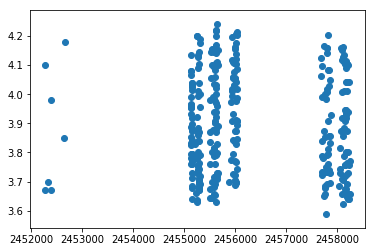

In [14]:
plt.scatter(time, mag)
# plt.xlim(2455800,2456200)

In [9]:
(time.max()-time.min())

16.328767123287673

We are going to guess some values to fold the light curve. Try out a few and see what happens

In [47]:
period = 10.1483
period2 = 10.14813554

In [48]:
phase = np.remainder(time, period)/period
phase2 = np.remainder(time,period2)/period2

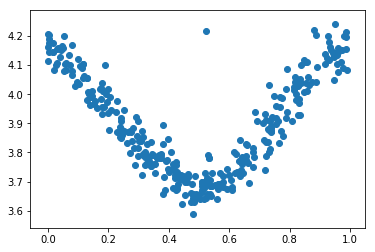

In [49]:
# plt.figure(figsize=(16,8))
# plt.scatter(phase,mag)
plt.scatter(phase2,mag)

If you have stumbled on the actual period, congratulations. Rinse and repeat for every known Cepheid.<br>
If not, we need something a bit better than visually inspecting the data. 

In [36]:
frequency,power=LombScargle(time, mag).autopower()

(0.0975, 0.1)

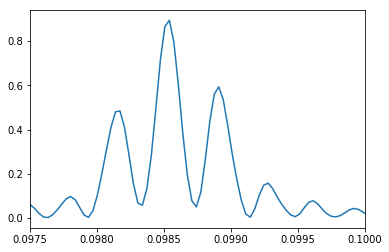

In [39]:
# plt.figure(figsize=(14,6))
plt.plot(frequency,power)
plt.xlim(0.0975,0.1)

In [40]:
condition = (frequency>0.098)&(frequency<0.099)
peak_indices = find_peaks(power[condition])[0]

In [41]:
peak_indices

array([ 5, 16, 27])

In [42]:
1/frequency[condition][peak_indices]

array([10.18629294, 10.14813554, 10.11026293])

In [50]:
period_best = 1/frequency[condition][16]

In [51]:
period_best

10.14813553550145

Plot the phase folded light curve for this period.

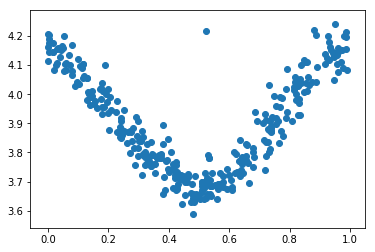

In [52]:
phase = np.remainder(time, period_best)/period_best
plt.scatter(phase,mag)

We define the functions below to make life easier while analysing light curve data.

In [55]:
def find_period(time, mag, error_mag=None):
    # define a function to find the best period like we did earlier
    frequency,power=LombScargle(time, mag).autopower()
    return 1/frequency[power.argmax()]
    
    
def phase_fold(time, period):
    phase = np.remainder(time, period)/period# put in the expression here
    return phase

def plot_best(time, mag, error_mag = None,force_period=None):
    if force_period==None:
        period = find_period(time, mag, error_mag)
    else:
        period = force_period
    phase = phase_fold(time, period)
    plt.errorbar(phase, mag,error_mag,ls='',marker='.',markersize=12)

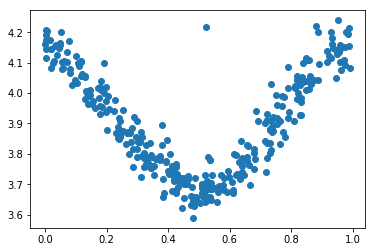

In [56]:
plot_best(time,mag)

In [57]:
find_period(time,mag)

10.14813553550145

Let's try the light curve of an asteroid now. Note the period of the light curve. What do you think could be causing this?

In [58]:
time_asteroid, mag_asteroid = np.loadtxt('./asteroid.csv',delimiter=',',skiprows=1).T

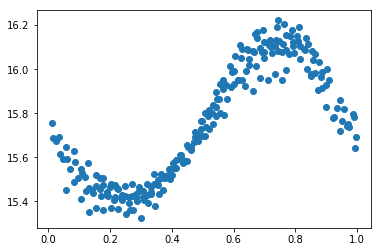

In [59]:
plot_best(time_asteroid,mag_asteroid)

In [62]:
find_period(time_asteroid,mag_asteroid)

0.12391150442767986

In [85]:
time1, mag1 = np.genfromtxt('polaris.txt',delimiter=',',skip_header=1,usecols=(0,1),unpack=True)

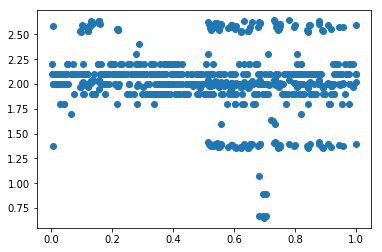

In [86]:
plot_best(time1,mag1)

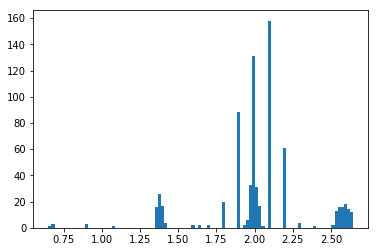

In [87]:
plt.hist(mag1,bins=100);
# plt.xlim(1.91,2.08)

Do you feel anything is wrong with the above histogram? If so correct for that in the cell below

The problem is all the anomalous data that is most likely wrong. Either mistakes in calibration of the magnitudes or a different filter that was used, or maybe the raw images themselves were not good enough

In [88]:
time1 = time1[(mag1>2.5)]
mag1 = mag1[(mag1>2.5)]

In [89]:
frequency = np.arange(0.2,0.3,0.00001)
power = LombScargle(time1,mag1).power(frequency)
# frequency, power = LombScargle(time1,mag1).autopower()

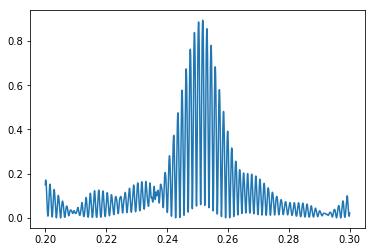

In [90]:
plt.plot(frequency,power)

In [91]:
1/frequency[power.argmax()]

3.9725102292130234

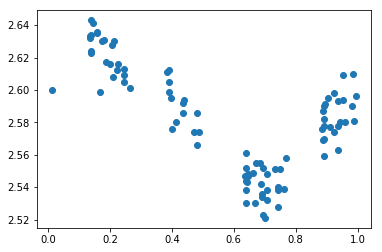

In [92]:
plot_best(time1,mag1)

In [93]:
time1.size

91

Moral of the story?

A few resources to finish up:

* [Understanding the Lombe-Scargle Periodogram](https://arxiv.org/abs/1703.09824)
* [Gaia Archive](http://gea.esac.esa.int/archive/)
* [Vizier](http://cdsarc.u-strasbg.fr/), a catalogue of catalogues. You can query data from Gaia here as well, along with other missions
* [The Scipy-Lectures](http://scipy-lectures.org/), useful for learning how to use Python for scientific data analysis